In [151]:
import numpy as np
import gzip
import urllib.request
import pickle
import os
import matplotlib.pyplot as plt
from PIL import Image

In [24]:
def sigmoid(x):
        return 1/(1 + np.exp(-x))

In [71]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    return exp_a/np.sum(exp_a)

In [103]:
class MnistData():

    image_size = 28*28
    dataset_dir = 'dataset'
    dataset_pkl = 'mnist.pkl'
    url_base = 'http://jrkwon.com/data/ece5831/mnist/'

    key_file = {
    'train_images': 'train-images-idx3-ubyte.gz',
    'train_labels': 'train-labels-idx1-ubyte.gz',
    'test_images': 't10k-images-idx3-ubyte.gz',
    'test_labels': 't10k-labels-idx1-ubyte.gz'
    }

    def __init__(self):
        self.dataset = {}
        self.dataset_pkl_path = f'{self.dataset_dir}/{self.dataset_pkl}'

        self._init_dataset()

    def _change_one_hot_label(self, y, num_class):
        t = np.zeros((y.size, num_class))
        for idx, row in enumerate(t):
            row[y[idx]] = 1
        
        return t

    def _download(self, file_name):
        file_path = self.dataset_dir + '/' + file_name

        if (os.path.exists(file_path)):
            print(f'File: {file_name} already exists.')
            return
        
        print(f'Downloading {file_name}...')
        urllib.request.urlretrieve(self.url_base + file_name, file_path)
        print('done')
    
    def _download_all(self):
        for file_name in self.key_file.values():
            self._download(file_name)

    def _load_images(self, file_name):
        with gzip.open(file_name, 'rb') as f:
            images = np.frombuffer(f.read(), np.uint8, offset=16)
        images = images.reshape(-1, self.image_size)

        return images
    
    def _load_labels(self, file_name):
        with gzip.open(file_name, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)

        return labels
    
    def _create_dataset(self):
       
        self.dataset['train_images'] = self._load_images(f"{dataset_dir}/{key_file['train_images']}")
        self.dataset['train_labels'] = self._load_labels(f"{dataset_dir}/{key_file['train_labels']}")
        self.dataset['test_images'] = self._load_images(f"{dataset_dir}/{key_file['test_images']}")
        self.dataset['test_labels'] = self._load_labels(f"{dataset_dir}/{key_file['test_labels']}")
        
        with open(f'{self.dataset_pkl_path}', 'wb') as f:
            print(f'Pickle: {self.dataset_dir}/{self.dataset_pkl} is being created')
            pickle.dump(self.dataset, f)
            print('Done')

    def _init_dataset(self):
        self._download_all()
        if os.path.exists(f'{self.dataset_dir}/{self.dataset_pkl}'):
            with open(f'{self.dataset_dir}/{self.dataset_pkl}', 'rb') as f:
                print(f'Pickle: {self.dataset_dir}/{self.dataset_pkl} already exists.')
                print('loading....')
                self.dataset = pickle.load(f)
                print('Done')

        else:
            dataset = _create_dataset()

    def load(self):
        # normalize image datasets
        for key in ('train_images','test_images'):
            self.dataset[key] = self.dataset[key].astype(np.float32)
            self.dataset[key] /= 255.0
        
        # One-hot encoding
        for key in ('train_labels', 'test_labels'):
            self.dataset[key] = self._change_one_hot_label(self.dataset[key], 10)

        return (self.dataset['test_images'], self.dataset['train_labels']), \
            (self.dataset['test_images'], self.dataset['test_labels'])



In [55]:
idx = 20

In [85]:
img = MnistData().dataset['train_images'][idx]

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
loading....
Done


In [221]:
img = Image.open("Custom MNIST Sample/Digit 7/7_1.png").convert('L')
img = img.resize((28,28))
img = np.array(img)
img = 255.0 - img
img = (img - np.min(img))*(255/(np.max(img)-np.min(img)))
img = img.astype(np.float32)/255
img = img.flatten()

In [222]:
img.shape

(784,)

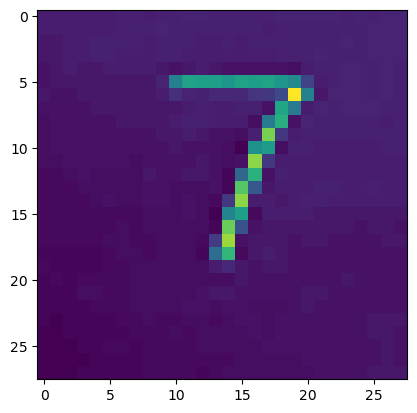

In [223]:
a = img.reshape(28,28)
plt.imshow(a)

In [224]:
mnist_data = MnistData()
(_, _), (test_images, test_labels) = mnist_data.load()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
loading....
Done


In [225]:
def init_network():
    with open('model/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

In [226]:
net = init_network()

In [227]:
net

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
        -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
         0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
         0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
        -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
        -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
         0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
        -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
         0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
        -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
        -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
         0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
         0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
         0.02454282,  0.05875788,  0.08505439

In [61]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    return exp_a/np.sum(exp_a)

In [228]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [290]:
img = Image.open("Custom MNIST Sample/Digit 9/9_4.png").convert('L')
img = img.resize((28,28))
img = np.array(img)
img = 255.0 - img
img = (img - np.min(img))*(255/(np.max(img)-np.min(img)))
img = img.astype(np.float32)/255
img = img.flatten()

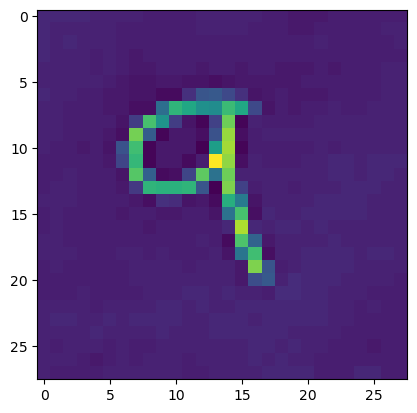

In [291]:
a = img.reshape(28,28)
plt.imshow(a)

In [292]:
predict(net, img)

array([1.6437465e-03, 8.8038556e-03, 3.5894285e-03, 2.0200320e-01,
       1.6229160e-03, 6.5365297e-01, 4.5437561e-04, 3.3650935e-02,
       7.1028940e-02, 2.3549598e-02], dtype=float32)

In [293]:
y_hat = predict(net, img)

In [294]:
p = np.argmax(y_hat)

In [295]:
p

5

In [207]:
class Mnist():
    def __init__(self):
        self.data = MnistData()
        self.params = {}

    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def softmax(self, a):
        c = np.max(a)
        exp_a = np.exp(a - c)
        return exp_a/np.sum(exp_a)
    
    def load(self):
        (x_train, y_train), (x_test, y_test) = self.data.load()
        return (x_train, y_train),(x_test, y_test)
    
    def init_network(self):
        with open('model/sample_weight.pkl', 'rb') as f:
            self.params = pickle.load(f)

    def predict(self, x):
        W1, W2, W3 = self.params['W1'], self.params['W2'], self.params['W3']
        b1, b2, b3 = self.params['b1'], self.params['b2'], self.params['b3']

        a1 = np.dot(x, W1) + b1
        z1 = self.sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = self.sigmoid(a2)
        a3 = np.dot(z2, W3) + b3
        y = self.softmax(a3)

        return y

In [208]:
mnist = Mnist()
(_, _), (test_images, test_labels) = mnist.load()
mnist.init_network()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
loading....
Done


In [188]:
mnist.params

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
        -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
         0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
         0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
        -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
        -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
         0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
        -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
         0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
        -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
        -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
         0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
         0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
         0.02454282,  0.05875788,  0.08505439

In [251]:
#idx = 21

x = img
#y = test_labels[idx]

In [252]:
y_hat = mnist.predict(x)


In [253]:
y_one_hot = 9
p = np.argmax(y_hat)

The image 21 is 9. The ground truth is 3.


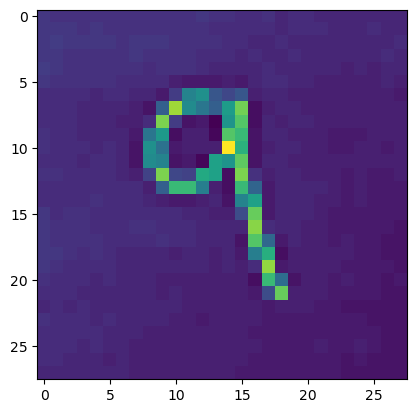

In [254]:
print(f'The image {idx} is {y_one_hot}. The ground truth is {p}.')
plt.imshow(x.reshape(28,28))

In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    return exp_a/np.sum(exp_a)

In [5]:
def get_data():
    (x_train, y_train), (x_test, y_test) = load_mnist()
    return x_test, t_test


def init_network():
    with open('model/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, y = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y_hat = predict(network, x[i])
    p = np.argmax(y_hat)
    if p == np.argmax(y[i]):
        accuracy_cnt += 1

accuracy = float(accuracy_cnt) / len(x)
print(f'Accuracy: {accuracy}')



NameError: name 'load_mnist' is not defined

In [7]:
## batch version

x, y = get_data()
network = init_network()
accuracy_cnt = 0
batch_size = 100

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_hat_batch = predict(network, x_batch)
    p = np.argmax(y_hat_batch, axis=1)
    y = np.argmax(y[i:i+batch_size], axis=1)
    accuracy_cnt += np.sum(p == y)

accuracy = float(accuracy_cnt) / len(x)
print(f'Accuracy: {accuracy}')



NameError: name 'load_mnist' is not defined